# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                         ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

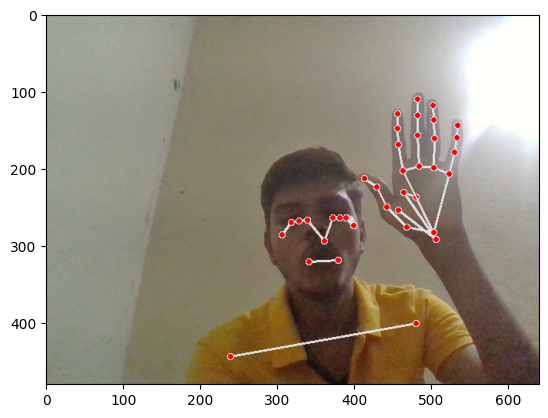

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [14]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.56542629,  0.61262733, -0.73793083, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.56542629,  0.61262733, -0.73793083, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(90, 30, 1662)

In [28]:
np.array(labels).shape

(90,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(90, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 9s 182ms/step - loss: 3.7928 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 1s 170ms/step - loss: 3.6892 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 1s 167ms/step - loss: 2.8029 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 1s 166ms/step - loss: 2.2026 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 1s 176ms/step - loss: 2.7582 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 1s 167ms/step - loss: 2.5051 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.8047 - categorical_accuracy: 0.4471
Epoch 8/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.5686 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 1s 160ms/step - loss: 1.2216 - categorical_accuracy:

3/3 [==============================] - 1s 174ms/step - loss: 0.6838 - categorical_accuracy: 0.6824
Epoch 74/2000
3/3 [==============================] - 1s 168ms/step - loss: 0.6626 - categorical_accuracy: 0.6706
Epoch 75/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.7727 - categorical_accuracy: 0.6118
Epoch 76/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.7633 - categorical_accuracy: 0.6353
Epoch 77/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.6887 - categorical_accuracy: 0.7059
Epoch 78/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.6857 - categorical_accuracy: 0.6471
Epoch 79/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.6798 - categorical_accuracy: 0.7059
Epoch 80/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.8559 - categorical_accuracy: 0.6471
Epoch 81/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.7789 - categorical_accuracy: 0.63

Epoch 145/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.1479 - categorical_accuracy: 0.3882
Epoch 146/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.1627 - categorical_accuracy: 0.3882
Epoch 147/2000
3/3 [==============================] - 0s 167ms/step - loss: 1.4739 - categorical_accuracy: 0.3882
Epoch 148/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.4267 - categorical_accuracy: 0.3765
Epoch 149/2000
3/3 [==============================] - 0s 154ms/step - loss: 4.8269 - categorical_accuracy: 0.3647
Epoch 150/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0947 - categorical_accuracy: 0.3765
Epoch 151/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.1029 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0698 - categorical_accuracy: 0.3412
Epoch 153/2000
3/3 [==============================] - 0s 165ms/step - loss: 5.1918 - cat

3/3 [==============================] - 1s 165ms/step - loss: 1.0192 - categorical_accuracy: 0.4824
Epoch 217/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0194 - categorical_accuracy: 0.4824
Epoch 218/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0190 - categorical_accuracy: 0.4824
Epoch 219/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0187 - categorical_accuracy: 0.4824
Epoch 220/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.0171 - categorical_accuracy: 0.4824
Epoch 221/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0154 - categorical_accuracy: 0.4824
Epoch 222/2000
3/3 [==============================] - 1s 174ms/step - loss: 1.0129 - categorical_accuracy: 0.4824
Epoch 223/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0154 - categorical_accuracy: 0.4824
Epoch 224/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0158 - categorical_accura

Epoch 288/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.9512 - categorical_accuracy: 0.5412
Epoch 289/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.9400 - categorical_accuracy: 0.5176
Epoch 290/2000
3/3 [==============================] - 0s 176ms/step - loss: 0.9385 - categorical_accuracy: 0.5294
Epoch 291/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.9352 - categorical_accuracy: 0.5647
Epoch 292/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.9239 - categorical_accuracy: 0.5412
Epoch 293/2000
3/3 [==============================] - 0s 160ms/step - loss: 0.9371 - categorical_accuracy: 0.5176
Epoch 294/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.9133 - categorical_accuracy: 0.5882
Epoch 295/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.9193 - categorical_accuracy: 0.5647
Epoch 296/2000
3/3 [==============================] - 1s 163ms/step - loss: 0.9240 - cat

3/3 [==============================] - 1s 174ms/step - loss: 0.8801 - categorical_accuracy: 0.5529
Epoch 360/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.8530 - categorical_accuracy: 0.5882
Epoch 361/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.8386 - categorical_accuracy: 0.5647
Epoch 362/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.8340 - categorical_accuracy: 0.6118
Epoch 363/2000
3/3 [==============================] - 0s 170ms/step - loss: 0.8588 - categorical_accuracy: 0.5294
Epoch 364/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.8311 - categorical_accuracy: 0.5765
Epoch 365/2000
3/3 [==============================] - 0s 166ms/step - loss: 0.8448 - categorical_accuracy: 0.5412
Epoch 366/2000
3/3 [==============================] - 0s 168ms/step - loss: 0.9032 - categorical_accuracy: 0.5294
Epoch 367/2000
3/3 [==============================] - 1s 166ms/step - loss: 0.8586 - categorical_accura

Epoch 431/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.1024 - categorical_accuracy: 0.3294
Epoch 432/2000
3/3 [==============================] - 1s 169ms/step - loss: 272.8017 - categorical_accuracy: 0.3882
Epoch 433/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.1172 - categorical_accuracy: 0.3765
Epoch 434/2000
3/3 [==============================] - 1s 179ms/step - loss: 1.3352 - categorical_accuracy: 0.2471
Epoch 435/2000
3/3 [==============================] - 1s 175ms/step - loss: 211.2391 - categorical_accuracy: 0.2824
Epoch 436/2000
3/3 [==============================] - 1s 170ms/step - loss: 500.6683 - categorical_accuracy: 0.3882
Epoch 437/2000
3/3 [==============================] - 1s 171ms/step - loss: 85.5829 - categorical_accuracy: 0.3412
Epoch 438/2000
3/3 [==============================] - 0s 161ms/step - loss: 338.9456 - categorical_accuracy: 0.2824
Epoch 439/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.1

3/3 [==============================] - 0s 172ms/step - loss: 1.1002 - categorical_accuracy: 0.3294
Epoch 503/2000
3/3 [==============================] - 1s 162ms/step - loss: 1.1001 - categorical_accuracy: 0.3294
Epoch 504/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.1000 - categorical_accuracy: 0.3294
Epoch 505/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.1000 - categorical_accuracy: 0.3294
Epoch 506/2000
3/3 [==============================] - 1s 174ms/step - loss: 1.1000 - categorical_accuracy: 0.3294
Epoch 507/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.0999 - categorical_accuracy: 0.3294
Epoch 508/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0997 - categorical_accuracy: 0.3294
Epoch 509/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0998 - categorical_accuracy: 0.3294
Epoch 510/2000
3/3 [==============================] - 1s 174ms/step - loss: 1.0996 - categorical_accura

Epoch 574/2000
3/3 [==============================] - 0s 177ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 575/2000
3/3 [==============================] - 0s 176ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 576/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 577/2000
3/3 [==============================] - 0s 170ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 578/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 579/2000
3/3 [==============================] - 0s 176ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 580/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 581/2000
3/3 [==============================] - 0s 172ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 176ms/step - loss: 1.0987 - cat

3/3 [==============================] - 1s 162ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 646/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 647/2000
3/3 [==============================] - 0s 173ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 648/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 649/2000
3/3 [==============================] - 0s 173ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 650/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 651/2000
3/3 [==============================] - 1s 190ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 652/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 653/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accura

Epoch 717/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 718/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 719/2000
3/3 [==============================] - 0s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 720/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 721/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 722/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 723/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 724/2000
3/3 [==============================] - 0s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - cat

3/3 [==============================] - 0s 147ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 789/2000
3/3 [==============================] - 0s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 790/2000
3/3 [==============================] - 0s 178ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 791/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 792/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 793/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 794/2000
3/3 [==============================] - 1s 176ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 795/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 796/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0985 - categorical_accura

Epoch 860/2000
3/3 [==============================] - 1s 176ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 861/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 862/2000
3/3 [==============================] - 1s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 863/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 864/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 865/2000
3/3 [==============================] - 1s 173ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 866/2000
3/3 [==============================] - 1s 173ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 867/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 868/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - cat

3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 932/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 933/2000
3/3 [==============================] - 1s 176ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 934/2000
3/3 [==============================] - 0s 175ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 935/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 936/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 937/2000
3/3 [==============================] - 0s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 938/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 939/2000
3/3 [==============================] - 0s 161ms/step - loss: 1.0985 - categorical_accura

Epoch 1003/2000
3/3 [==============================] - 0s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1004/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1005/2000
3/3 [==============================] - 0s 161ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1006/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1007/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1008/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1009/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1010/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1011/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0

3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1075/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1076/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1077/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1078/2000
3/3 [==============================] - 0s 172ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1079/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1080/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1081/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1082/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1146/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1147/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1148/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1149/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1150/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1151/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1152/2000
3/3 [==============================] - 1s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1153/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1217/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1218/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1219/2000
3/3 [==============================] - 0s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1220/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1221/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1222/2000
3/3 [==============================] - 1s 162ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1223/2000
3/3 [==============================] - 1s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1224/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 161ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1288/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1289/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1290/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1291/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1292/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1293/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1294/2000
3/3 [==============================] - 0s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1295/2000
3/3 [==============================] - 0s 167ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1359/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1360/2000
3/3 [==============================] - 1s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1361/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1362/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1363/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1364/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1365/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1366/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 1s 173ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1430/2000
3/3 [==============================] - 1s 173ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1431/2000
3/3 [==============================] - 1s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1432/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1433/2000
3/3 [==============================] - 1s 182ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1434/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1435/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1436/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1437/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0986 - categorica

3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1501/2000
3/3 [==============================] - 0s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1502/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1503/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1504/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1505/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1506/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1507/2000
3/3 [==============================] - 0s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1508/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 165ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1572/2000
3/3 [==============================] - 0s 158ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1573/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1574/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1575/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1576/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1577/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1578/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1579/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1643/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1644/2000
3/3 [==============================] - 1s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1645/2000
3/3 [==============================] - 0s 177ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1646/2000
3/3 [==============================] - 0s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1647/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1648/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1649/2000
3/3 [==============================] - 1s 177ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1650/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 1s 174ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1714/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1715/2000
3/3 [==============================] - 0s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1716/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1717/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1718/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1719/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1720/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1721/2000
3/3 [==============================] - 1s 162ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1785/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1786/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1787/2000
3/3 [==============================] - 0s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1788/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1789/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1790/2000
3/3 [==============================] - 1s 179ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1791/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1792/2000
3/3 [==============================] - 1s 183ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1856/2000
3/3 [==============================] - 0s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1857/2000
3/3 [==============================] - 1s 171ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1858/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1859/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0987 - categorical_accuracy: 0.3412
Epoch 1860/2000
3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1861/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1862/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1863/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1927/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1928/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1929/2000
3/3 [==============================] - 1s 172ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1930/2000
3/3 [==============================] - 1s 166ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1931/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1932/2000
3/3 [==============================] - 0s 167ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1933/2000
3/3 [==============================] - 1s 165ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1934/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0985 - categorica

3/3 [==============================] - 0s 158ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1998/2000
3/3 [==============================] - 0s 164ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1999/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 2000/2000
3/3 [==============================] - 0s 163ms/step - loss: 1.0985 - categorical_accuracy: 0.3412


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [40]:
res = model.predict(X_test)

1/1 [==============================] - 1s 856ms/step


In [41]:
actions[np.argmax(res[4])]

'hello'

In [42]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [43]:
model.save('action.h5')

In [60]:
del model

In [44]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 60ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 4],
        [0, 1]],

       [[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [50]:
from scipy import stats

In [51]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [52]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'mediapipe.pyth